In [1]:
import sys
import cv2 as cv
import math
import numpy as np
import matplotlib.pyplot as plt
import imutils
from math import sqrt,exp

In [2]:
'''
    Написати програму яка шукає шаблон на зображені наступним чином 
    Підготовка
    1 - перетворює зображення на ЧБ.
    2 - знаходить контури на зображенні (canny)
    3 - будує матрицю M, елементами якої є манхетенська відстань до найближчого контуру
    Шаблон
    Шаблоном є бінарне зображення пікселі якого 1 або 0
    Пошук
    Результатом пошуку є така позиція шаблону на матриці, що сума всіх елементів M які відповідають 1 в шаблоні, була мінімальною.

'''

'\n    Написати програму яка шукає шаблон на зображені наступним чином \n    Підготовка\n    1 - перетворює зображення на ЧБ.\n    2 - знаходить контури на зображенні (canny)\n    3 - будує матрицю M, елементами якої є манхетенська відстань до найближчого контуру\n    Шаблон\n    Шаблоном є бінарне зображення пікселі якого 1 або 0\n    Пошук\n    Результатом пошуку є така позиція шаблону на матриці, що сума всіх елементів M які відповідають 1 в шаблоні, була мінімальною.\n\n'

In [3]:
#Пошук

def simplefindPos(MImage, edgesTemplate):
    dotsTemplate = np.argwhere(np.array(edgesTemplate) == 255)
    if (len(MImage)<len(edgesTemplate)) or (len(MImage[0])<len(edgesTemplate[0])):
        return 999999999,[]

    edgesRows = len(edgesTemplate)
    edgesCols = len(edgesTemplate[0])

    rows = len(MImage)
    cols = len(MImage[0])

    minSum = 1000000000
    minSumX = 0
    minSumY = 0

    for row in range(rows):
        for col in range(cols):
            if edgesRows+row>=rows or edgesCols+col>=cols:
                continue
            sum=0
            for xy in dotsTemplate:
                sum+=MImage[xy[0]+row][xy[1]+col]
                if minSum< sum:
                    break
            if minSum> sum:
                minSum = sum
                minSumX = row
                minSumY = col

    posMatrix=[[0 for i in range(cols)] for j in range(rows) ]
    for xy in dotsTemplate:
        posMatrix[xy[0]+minSumX][xy[1]+minSumY]=255

    return minSum, posMatrix

In [4]:
#будує матрицю M, елементами якої є манхетенська відстань до найближчого контуру
def getM(edges):
    rows = len(edges)
    cols = len(edges[0])
    
    M = [[rows+cols+1 for i in range(cols)] for i in range(rows) ]

    dots = np.argwhere(np.array(edges) ==255)

    for el in dots:
        for irow in range(rows):
            for icol in range(cols): 
                if M[irow][icol]> abs((irow-el[0]))+abs((icol-el[1])):
                    M[irow][icol]= abs((irow-el[0]))+abs((icol-el[1]))

    return M

In [5]:
#завантажує зображення
def loadImage(name):
    return cv.imread(name)

In [6]:
def loadTemplate(name):
    template = cv.imread(name)
    templateBW = imageBlackandWhite(template)
    return getEdges(templateBW,100,200)

In [7]:
#знаходить контури на зображенні (canny)
def getEdges(img, minP, maxP):
    return cv.Canny(img,minP,maxP)

In [8]:
#перетворює зображення на ЧБ
def imageBlackandWhite(image):

    grayImage = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    (thresh, blackAndWhiteImage) = cv.threshold(grayImage, 127, 255, cv.THRESH_BINARY)
    
    return grayImage

In [9]:
def connect(image1, template1Pos):
    rows = len(image1)
    cols = len(image1[0])

    image1template1 = [[0 for i in range(cols)] for i in range(rows) ]

    for row in range(rows):
        for col in range(cols):
            if template1Pos[row][col]==255:
                image1template1[row][col]=[255,0,0]
            else:
                image1template1[row][col]=image1[row][col]
    return image1template1

In [10]:
image1 = loadImage("template1.png")

In [11]:
image1BW = imageBlackandWhite(image1)

In [12]:
image1Edges = getEdges(image1BW,100,200)

In [13]:
image2 = loadImage("template2.png")

In [14]:
image2BW = imageBlackandWhite(image2)

In [15]:
image2Edges = getEdges(image2BW,100,200)

In [16]:
print(image1)

[[[255 254 255]
  [255 254 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 254 255]
  [255 254 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 254 255]
  [255 254 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[253 255 255]
  [253 255 255]
  [253 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 254 255]
  [253 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 254 255]
  [255 254 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]


Text(0.5, 1.0, 'Image 1')

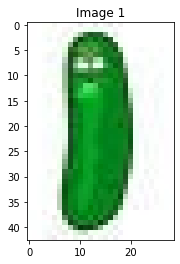

In [17]:
plt.imshow(image1)
plt.title('Image 1')

Text(0.5, 1.0, 'Image BW 1')

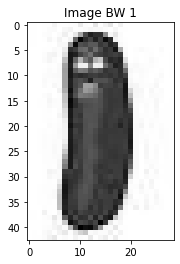

In [18]:
plt.imshow(image1BW, "gray")
plt.title('Image BW 1')

Text(0.5, 1.0, 'Image Edges 1')

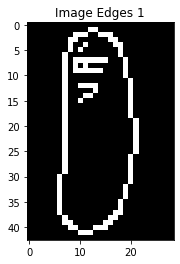

In [19]:
plt.imshow(image1Edges, "gray")
plt.title('Image Edges 1')

In [20]:
print(image2)

[[[138 124 218]
  [138 124 218]
  [138 124 218]
  ...
  [138 124 218]
  [138 124 218]
  [138 124 218]]

 [[138 124 218]
  [138 124 218]
  [138 124 218]
  ...
  [138 124 218]
  [138 124 218]
  [138 124 218]]

 [[137 123 217]
  [137 123 217]
  [137 123 217]
  ...
  [138 124 218]
  [138 124 218]
  [138 124 218]]

 ...

 [[ 37  46 136]
  [ 35  45 133]
  [ 34  44 132]
  ...
  [125 100 180]
  [125 100 180]
  [125 100 180]]

 [[ 37  46 136]
  [ 35  44 134]
  [ 34  44 132]
  ...
  [122 136  54]
  [122 136  54]
  [122 136  54]]

 [[ 46  53 133]
  [ 46  53 133]
  [ 46  53 133]
  ...
  [152 168  80]
  [152 168  80]
  [152 168  80]]]


Text(0.5, 1.0, 'Image 2')

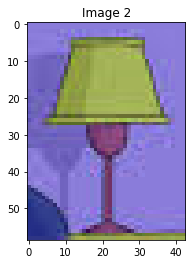

In [21]:
plt.imshow(image2)
plt.title('Image 2')

Text(0.5, 1.0, 'Image BW 2')

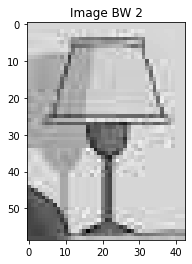

In [22]:
plt.imshow(image2BW, "gray")
plt.title('Image BW 2')

Text(0.5, 1.0, 'Image Edges 2')

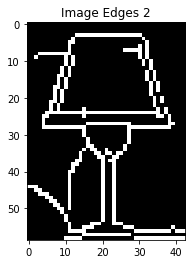

In [23]:
plt.imshow(image2Edges, "gray")
plt.title('Image Edges 2')

In [24]:
image1M = getM(image1Edges)

In [25]:
image2M = getM(image2Edges)

In [27]:
with open('imagetest1M.npy', 'rb') as f:
    image1M = np.load(f).tolist()

In [28]:
print(image1M)

[[11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 2, 2, 1, 1, 2, 2, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14], [10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 1, 1, 0, 0, 1, 1, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13], [9, 8, 7, 6, 5, 4, 3, 2, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], [8, 7, 6, 5, 4, 3, 2, 1, 0, 0, 1, 1, 2, 2, 1, 1, 0, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], [8, 7, 6, 5, 4, 3, 2, 1, 0, 1, 1, 0, 1, 2, 2, 2, 1, 0, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], [8, 7, 6, 5, 4, 3, 2, 1, 0, 1, 0, 1, 2, 2, 2, 2, 2, 1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], [7, 6, 5, 4, 3, 2, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], [7, 6, 5, 4, 3, 2, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [7, 6, 5, 4, 3, 2, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 2, 2, 1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [7, 6, 5, 4, 3, 2, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 2, 2, 1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [7, 6, 5, 4, 3, 2, 1, 0, 1, 1, 1, 1, 1, 1, 1, 2, 3, 2, 1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9], 

In [29]:
print(image2M)

NameError: name 'image2M' is not defined

In [30]:
template1 = loadTemplate("template1.png")

In [31]:
template2 = loadTemplate("template2.png")

Text(0.5, 1.0, 'Template 1')

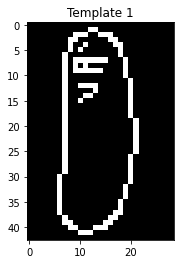

In [32]:
plt.imshow(template1, "gray")
plt.title('Template 1')

Text(0.5, 1.0, 'Template 2')

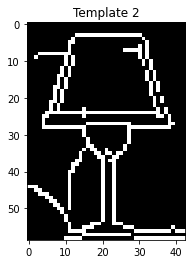

In [33]:
plt.imshow(template2, "gray")
plt.title('Template 2')

In [34]:
template1Sum, template1Pos = simplefindPos(image1M, template1)

In [35]:
template2Sum, template2Pos = simplefindPos(image2M, template2)

NameError: name 'image2M' is not defined

In [36]:
print(template1Pos)

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 255, 255, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 255, 255, 255, 0, 0, 255, 255, 255, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 255, 255, 0, 0, 0, 0, 0, 0, 255, 255, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 255, 0, 0, 255, 0, 0, 0, 0, 0, 255, 255, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 255, 0, 255, 0, 0, 0, 0, 0, 0, 0, 255, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 255, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 255, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 255, 0, 255, 255, 255, 255, 255, 255, 255, 0, 0, 0, 255, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 255, 0, 255, 0, 255, 0, 0, 0, 0, 0, 0, 0, 255, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 255, 0, 255, 255, 255, 255, 255, 255, 0, 0, 0, 0, 255, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 255

In [37]:
print(template2Pos)

NameError: name 'template2Pos' is not defined

Text(0.5, 1.0, 'Template pos 1')

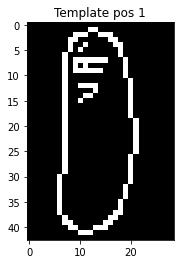

In [38]:
plt.imshow(template1Pos, "gray")
plt.title('Template pos 1')

In [39]:
plt.imshow(template2Pos, "gray")
plt.title('Template pos 1')

NameError: name 'template2Pos' is not defined

In [40]:
image1template1 = connect(image1, template1Pos)

In [41]:
image2template2 = connect(image2, template2Pos)

NameError: name 'template2Pos' is not defined

Text(0.5, 1.0, 'image1template1')

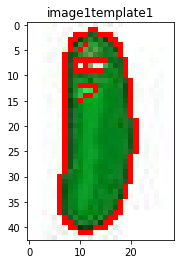

In [42]:
plt.imshow(image1template1)
plt.title('image1template1')
plt.imshow(image1template1)
plt.title('image1template1')

In [41]:

with open('imagetest1M.npy', 'wb') as f:
    np.save(f, np.array(image1M))
with open('imagetest1M.npy', 'rb') as f:
    a = np.load(f)

[[11 10  9 ... 12 13 14]
 [10  9  8 ... 11 12 13]
 [ 9  8  7 ... 10 11 12]
 ...
 [ 8  7  6 ... 11 12 13]
 [ 9  8  7 ... 12 13 14]
 [10  9  8 ... 13 14 15]]
